In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [41]:
heart_df = pd.read_csv('heart_failure.csv')
heart_df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [42]:
heart_df.info

<bound method DataFrame.info of       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


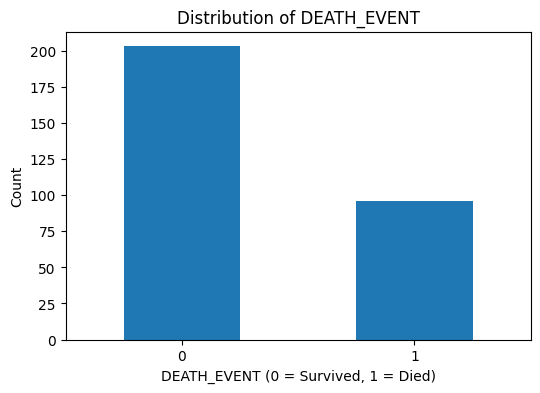

In [43]:
import matplotlib.pyplot as plt

# Distribution of target variable DEATH_EVENT
death_counts = heart_df['DEATH_EVENT'].value_counts()
print(death_counts)

# Plot the distribution
plt.figure(figsize=(6,4))
death_counts.plot(kind='bar')
plt.title('Distribution of DEATH_EVENT')
plt.xlabel('DEATH_EVENT (0 = Survived, 1 = Died)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [44]:
x=heart_df.drop('DEATH_EVENT', axis=1)
y=heart_df['DEATH_EVENT']


In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [46]:
x_test.head()
y_test.head()
x_train.head()
y_train.head()

6      1
183    1
185    1
146    0
30     1
Name: DEATH_EVENT, dtype: int64

In [47]:
# Correct the scaling to avoid data leakage: fit on train data only
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Retrain the model with correctly scaled data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)       

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60

Confusion Matrix:
 [[33  2]
 [13 12]]


In [48]:
import joblib
joblib.dump(model, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']